In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow

In [2]:
data = pd.read_csv('creditcard.csv')

# DATA Exploration

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [6]:
data.drop('Amount', axis=1, inplace=True)

In [7]:
data.drop('Time', axis=1, inplace=True)

In [8]:
#splitting the dataset:

X= data.iloc[:, data.columns != 'Class']

In [9]:
y = data['Class']

In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
X_train.shape

(199364, 29)

In [13]:
X_test.shape

(85443, 29)

In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep Neural Network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [16]:
model =  Sequential([
    Dense(units=16,input_dim=29, activation='relu'),  #how many cols in input=no of cols in df 
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(1, activation='sigmoid')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

# Model Training

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 65s 5ms/step - loss: 0.0089 - accuracy: 0.9984
Epoch 2/5
13291/13291 [==============================] - 62s 5ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 65s 5ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 63s 5ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 68s 5ms/step - loss: 0.0035 - accuracy: 0.9994


In [19]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 10s 4ms/step - loss: 0.0039 - accuracy: 0.9994


In [20]:
print(score)

[0.003851556684821844, 0.9993796944618225]


# Confusion Matrix:

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
y_pred = model.predict(X_test)

2671/2671 [==============================] - 8s 3ms/step


In [23]:
y_test = pd.DataFrame(y_test)

In [24]:
cm = confusion_matrix(y_test, y_pred.round() )

In [25]:
cm

array([[85276,    20],
       [   33,   114]], dtype=int64)

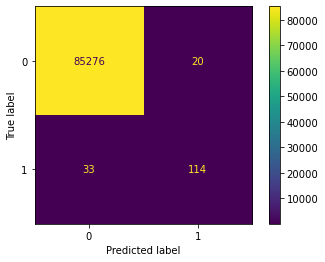

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()   

In [27]:
#testing on whole dataset:
y_pred_whole = model.predict(X)
y_expected = pd.DataFrame(y)

8901/8901 [==============================] - 28s 3ms/step


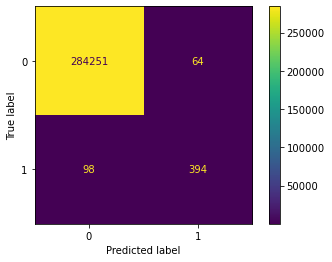

In [28]:
cm = confusion_matrix(y_expected, y_pred_whole.round() )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

# Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=100)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = rf.predict(X_test)

In [33]:
rf.score(X_test, y_test)

0.9995084442259752

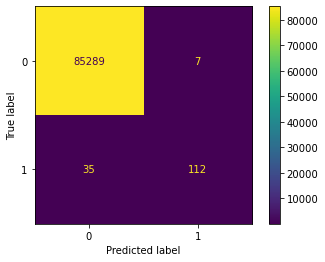

In [34]:
cm = confusion_matrix(y_test, y_pred.round() )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

In [35]:
#testing on whole dataset:
y_pred_whole = rf.predict(X)
y_expected = pd.DataFrame(y)

C:\Users\shubham.rangate\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


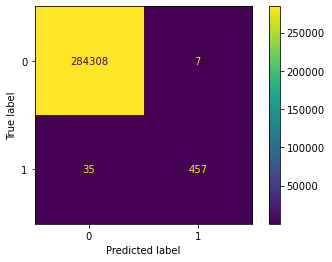

In [36]:
cm = confusion_matrix(y_expected, y_pred_whole.round() )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
decision_tree = DecisionTreeClassifier()

In [39]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = decision_tree.predict(X_test)

In [41]:
decision_tree.score(X_test, y_test)

0.9992509626300574

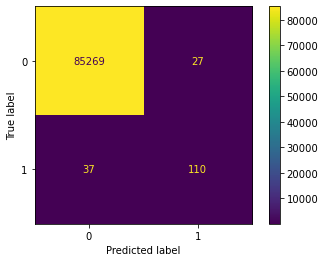

In [42]:
cm = confusion_matrix(y_test, y_pred.round() )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

In [43]:
#testing on whole dataset:
y_pred_whole = decision_tree.predict(X)
y_expected = pd.DataFrame(y)

C:\Users\shubham.rangate\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


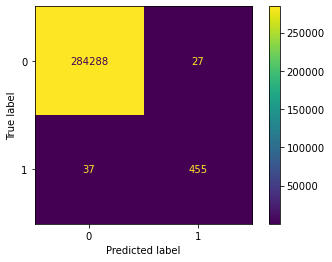

In [44]:
cm = confusion_matrix(y_expected, y_pred_whole.round() )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

# Undersampling

In [45]:
fraud_indices = np.array(data[data.Class==1].index)
fraud_records_count  = len(fraud_indices)

In [46]:
fraud_records_count

492

In [47]:
normal_indices = np.array(data[data.Class==0].index)

In [48]:
random_normal_indices = np.random.choice(normal_indices, fraud_records_count, replace=False)
print(len(random_normal_indices))

492


In [49]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

In [50]:
under_sample_data = data.iloc[under_sample_indices]

In [51]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data['Class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [53]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [54]:
#use previous model to train and test:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 2s 5ms/step - loss: 0.4334 - accuracy: 0.9012
Epoch 2/5
46/46 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.9186
Epoch 3/5
46/46 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.9288
Epoch 4/5
46/46 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9375
Epoch 5/5
46/46 [==============================] - 0s 4ms/step - loss: 0.1464 - accuracy: 0.9375


In [56]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


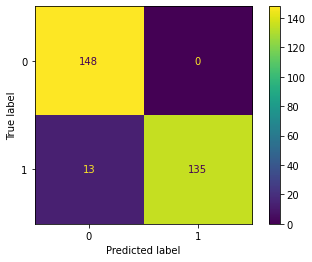

In [57]:
cm = confusion_matrix(y_test, y_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

In [58]:
#we observe some improvement in results after undersampling

# SMOTE

In [59]:
#Oversampling technique
# !pip install -U imbalanced-learn

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())

In [62]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [64]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 122s 5ms/step - loss: 0.0104 - accuracy: 0.9973
Epoch 4/5
26537/26537 [==============================] - 121s 5ms/step - loss: 0.0093 - accuracy: 0.9978
Epoch 5/5
26537/26537 [==============================] - 101s 4ms/step - loss: 0.0085 - accuracy: 0.9980


In [66]:
y_pred = model.predict(X_test)

5331/5331 [==============================] - 8s 1ms/step


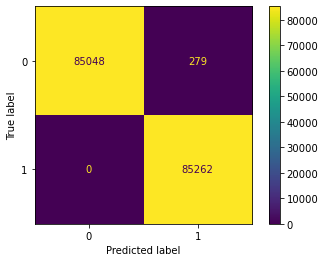

In [67]:
cm = confusion_matrix(y_test, y_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show() 

In [68]:
#we observed a way better improvement using SMOTE technique